# LAB | Ensemble Methods

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In this Lab, you should try different ensemble methods in order to see if can obtain a better model than before. In order to do a fair comparison, you should perform the same feature scaling, engineering applied in previous Lab.

In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [10]:
spaceship.dropna(inplace=True)

In [12]:
spaceship['Cabin'] = spaceship['Cabin'].apply(lambda x: x.split('/')[0])

In [13]:
spaceship.drop(columns=['PassengerId', 'Name'], inplace=True)

Now perform the same as before:
- Feature Scaling
- Feature Selection


In [17]:
df_dummies = pd.get_dummies(spaceship)
display(df_dummies.head())
display(df_dummies.columns)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,True,True,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,True,False,False,...,False,False,True,False,False,False,False,True,True,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,False,True,False,...,False,False,False,False,False,False,False,True,True,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True,True,False,False,...,False,False,True,False,False,False,False,True,True,False


Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_False', 'CryoSleep_True', 'Cabin_A',
       'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G',
       'Cabin_T', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True'],
      dtype='object')

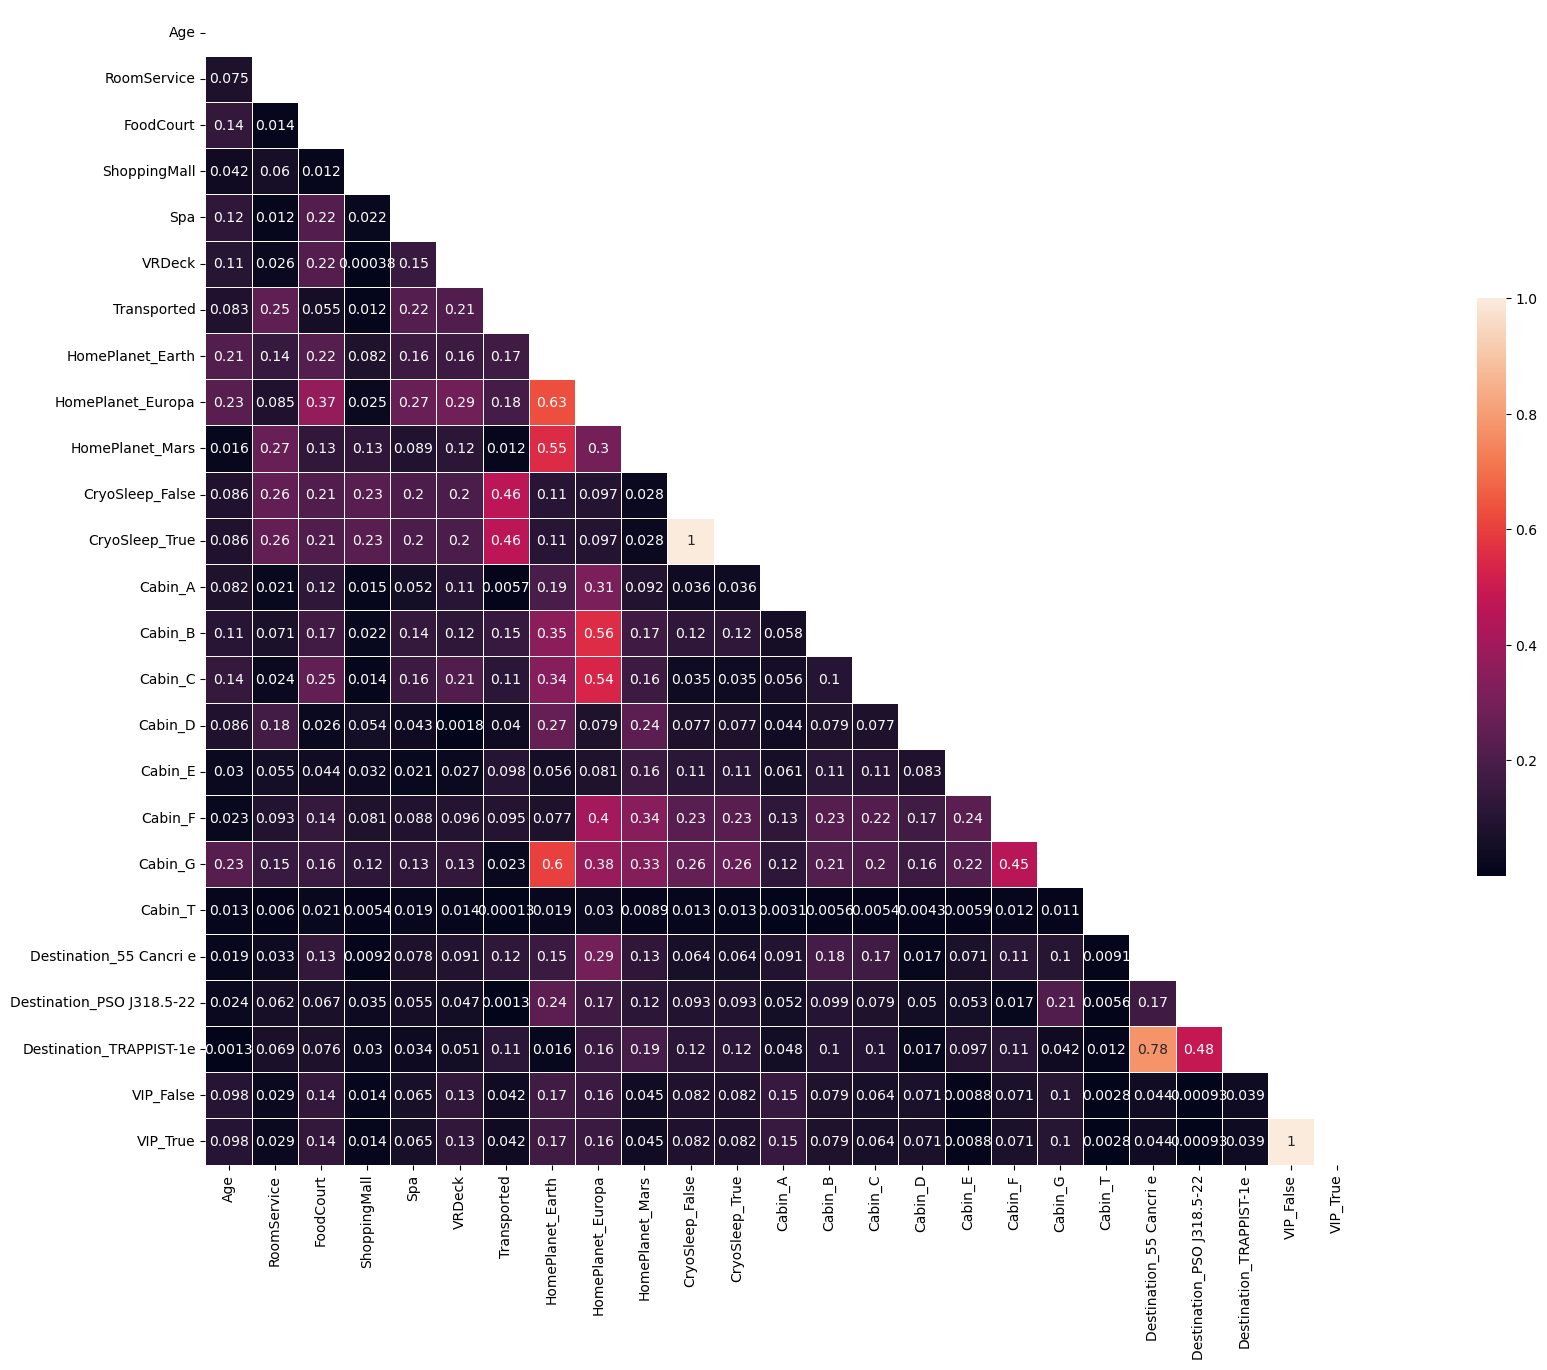

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=np.abs(df_dummies.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 15))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

**Perform Train Test Split**

In [25]:
features = df_dummies.drop(columns = ['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'VIP_False', 'VIP_True', 'Cabin_A', 'Cabin_B', 
                                      'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'FoodCourt', 'ShoppingMall', 'Age'])
target = df_dummies["Transported"]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

normalizer = MinMaxScaler()
normalizer.fit(X_train)

MinMaxScaler()

In [30]:
X_train_norm = pd.DataFrame(normalizer.transform(X_train), columns=X_train.columns)
X_test_norm = pd.DataFrame(normalizer.transform(X_test), columns=X_test.columns)
display(X_train_norm)
display(X_test_norm)


,RoomService,Spa,VRDeck,Transported,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1.0
1,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,1.0
2,0.000000,0.051276,0.000000,0.0,1.0,0.0,0.0,0.0,1.0
3,0.001310,0.016378,0.000049,0.0,1.0,0.0,0.0,0.0,1.0
4,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
5279,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0
5280,0.000000,0.032355,0.000098,0.0,1.0,0.0,1.0,0.0,0.0
5281,0.000000,0.348893,0.004721,0.0,1.0,0.0,0.0,0.0,1.0
5282,0.000000,0.030569,0.087480,0.0,1.0,0.0,0.0,0.0,1.0


,RoomService,Spa,VRDeck,Transported,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0.000000,0.000000,0.000000,1.0,0.0,1.0,1.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0
2,0.000000,0.000000,0.000000,1.0,0.0,1.0,1.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0
4,0.000000,0.077740,0.000000,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1317,0.000000,0.000045,0.001672,0.0,1.0,0.0,0.0,0.0,1.0
1318,0.030242,0.000045,0.008409,1.0,1.0,0.0,0.0,0.0,1.0
1319,0.000202,0.000312,0.000000,1.0,1.0,0.0,0.0,0.0,1.0
1320,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.0


**Model Selection** - now you will try to apply different ensemble methods in order to get a better model

In [58]:
from sklearn.ensemble import BaggingClassifier, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier

- Bagging and Pasting

In [59]:

bagging_clas = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=100,
                               max_samples = 1000,
                               bootstrap=True) 

In [67]:
bagging_clas.fit(X_train_norm, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=1000,
                  n_estimators=100)

In [66]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
pred = bagging_clas.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("Accuracy score", accuracy_score(y_test, pred))

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

- Random Forests

In [42]:
forest = RandomForestRegressor(n_estimators=100)

In [43]:
forest.fit(X_train_norm, y_train)

RandomForestRegressor()

In [44]:
pred = forest.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", r2_score(y_test, pred))

MAE 0.0
RMSE 0.0
R2 score 1.0


/Users/aruzhanakbayeva/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [45]:
df_compare = pd.DataFrame(y_test.values, columns = ['y_true'])
df_compare['pred'] = pred
df_compare

,y_true,pred
0,True,1.0
1,False,0.0
2,True,1.0
3,False,0.0
4,True,1.0
...,...,...
1317,False,0.0
1318,True,1.0
1319,True,1.0
1320,True,1.0


- Gradient Boosting

In [46]:
gb_reg = GradientBoostingRegressor(n_estimators=100)

- Adaptive Boosting

In [ ]:
#your code here

Which model is the best and why?

In [ ]:
#comment here